In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import itertools
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import auc, roc_curve
from sklearn.decomposition import PCA
%matplotlib inline

d:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
d:\anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
df_wine = pd.read_csv('D:\my_dateset\wine.csv')

In [4]:
le = LabelEncoder()
df_wine['type'] = le.fit_transform(df_wine['type'])
le.classes_
le.transform(le.classes_)
dict(zip(le.classes_, le.transform(le.classes_)))
df_wine.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [5]:
X=df_wine.drop(['type'],axis=1)
Y=df_wine['type']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape


((5197, 12), (1300, 12))

# 四种模型构建

In [6]:
LR1 = LogisticRegression()
LR1.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
svm = SVC(kernel='linear', C=1.0, random_state=0,probability=True)
svm.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [8]:
cl=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
cl.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
cl1=RF(n_estimators=10,criterion='entropy',random_state=0)
cl1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# 四种模型预测

             precision    recall  f1-score   support

          0       0.96      0.97      0.97       311
          1       0.99      0.99      0.99       989

avg / total       0.98      0.98      0.98      1300



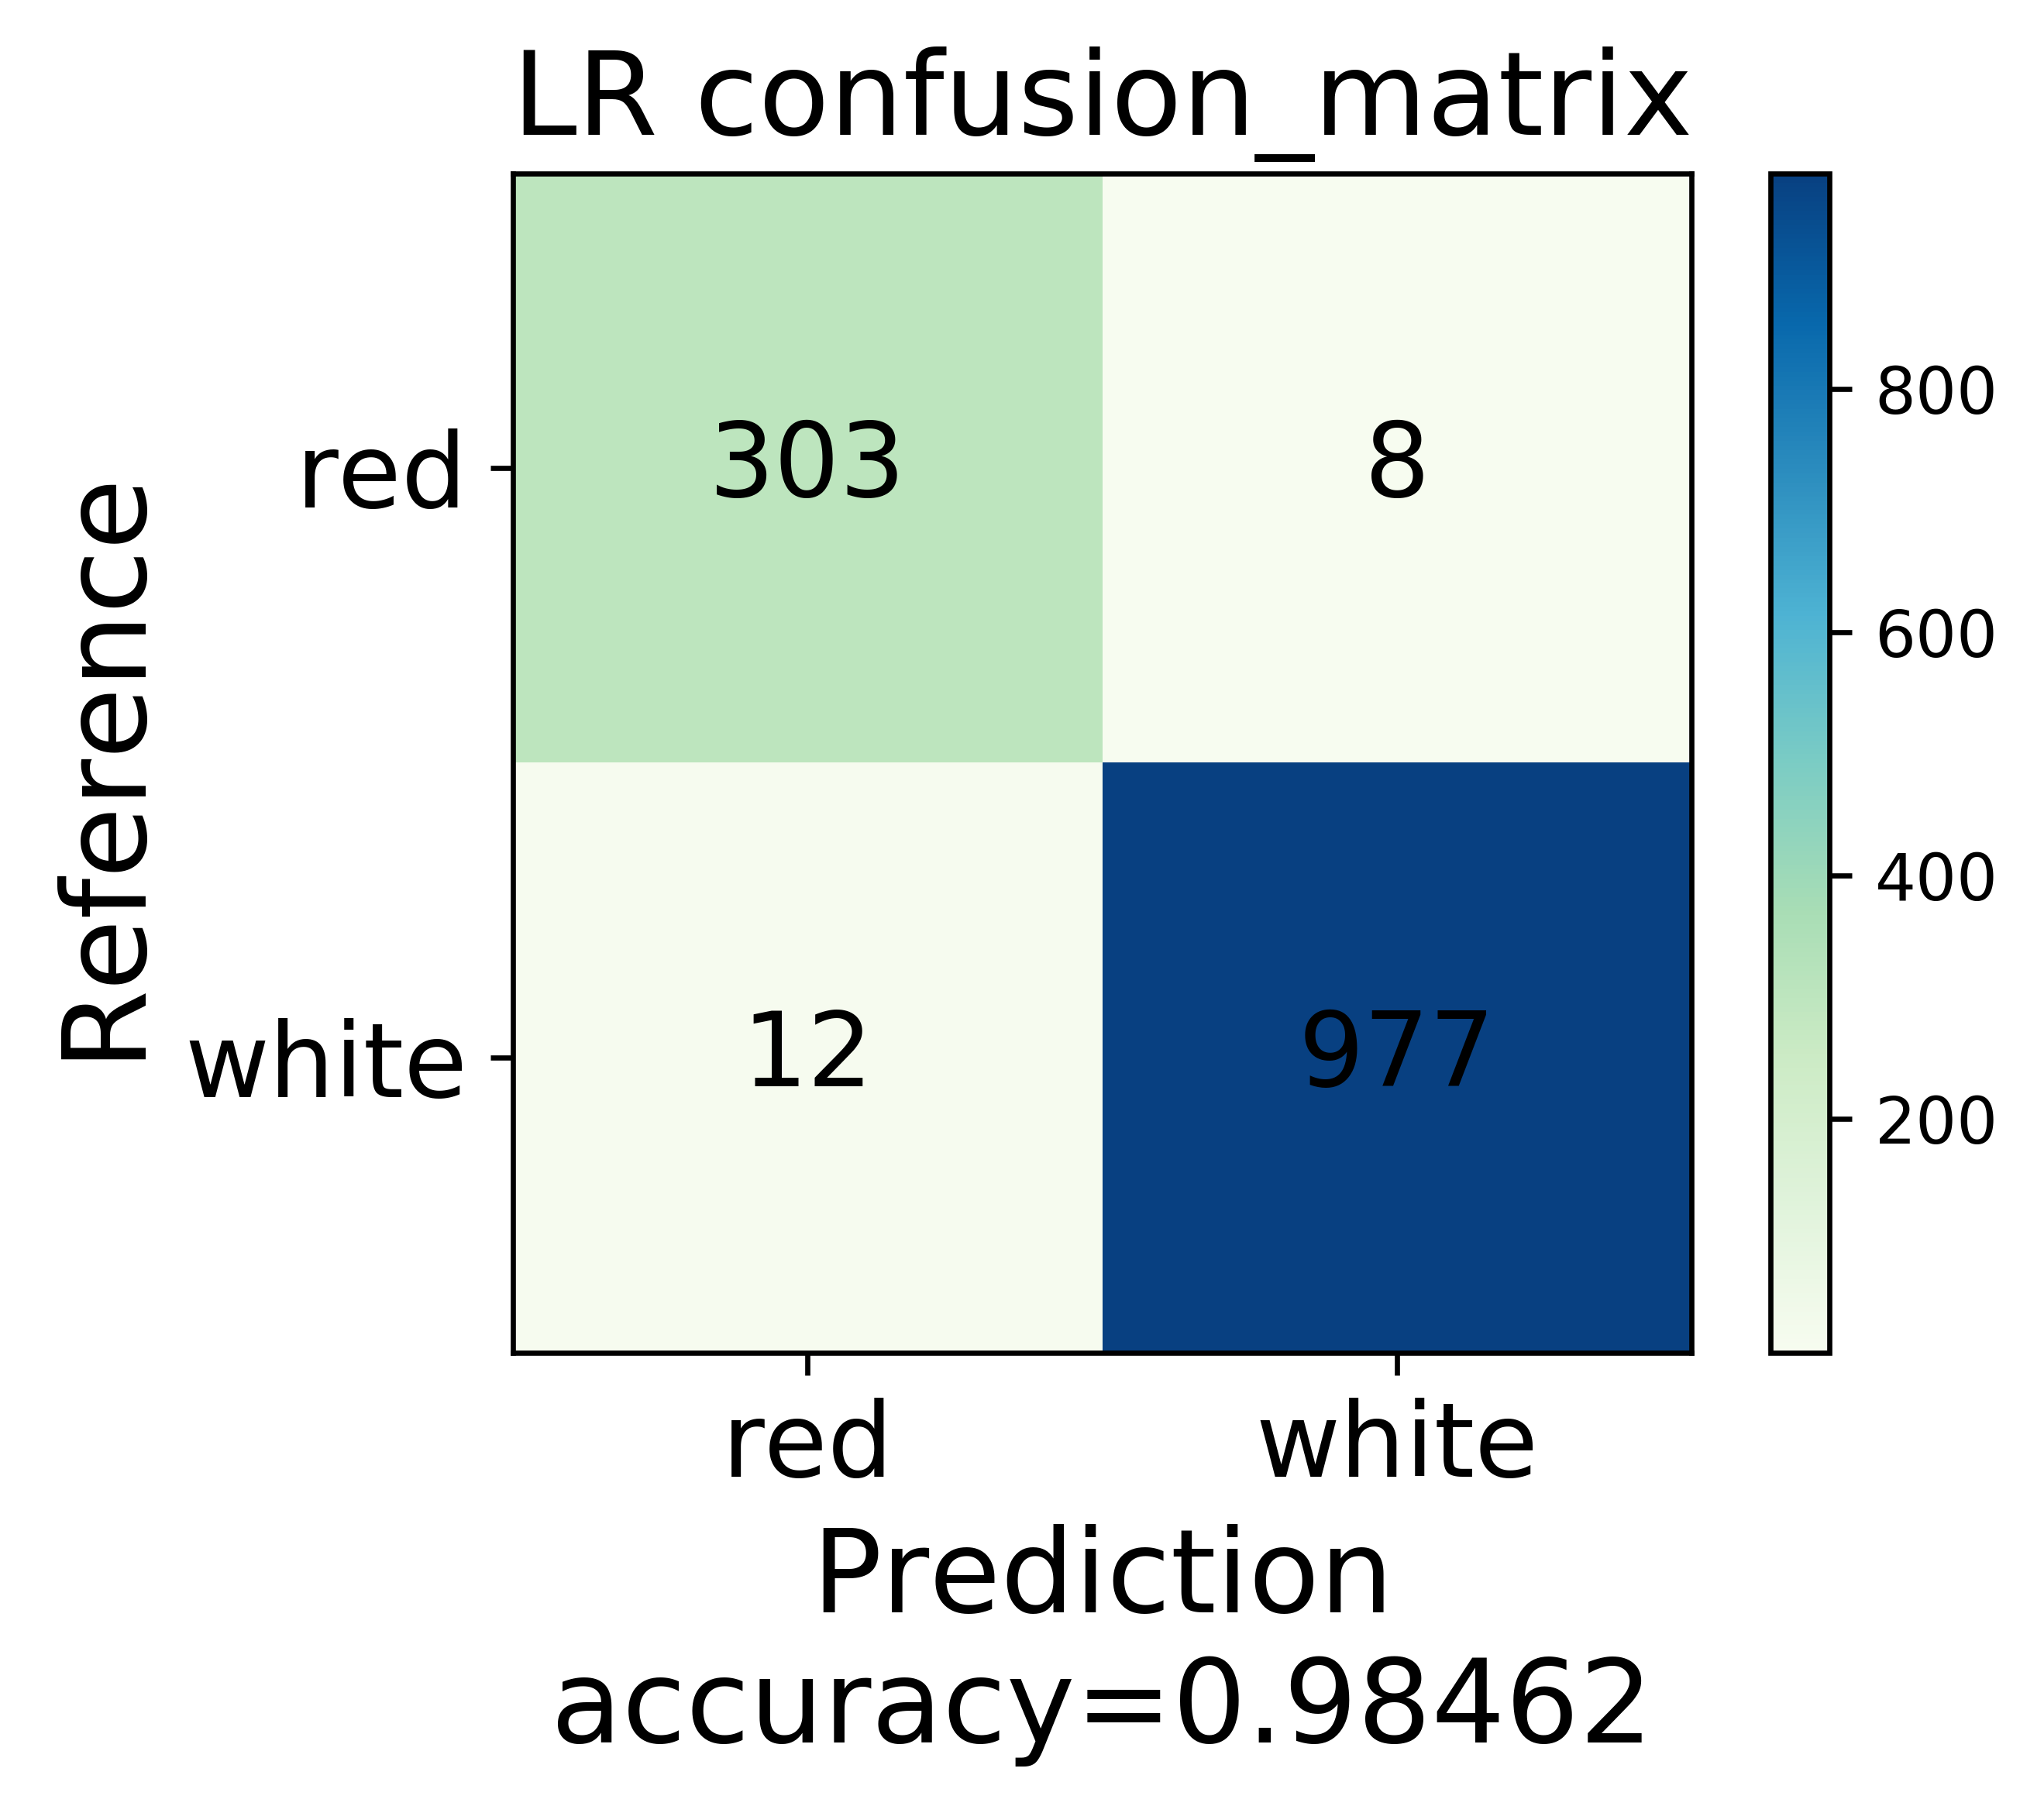

In [10]:
y1_predict = LR1.predict(X_test)
y1_acc = accuracy_score(Y_test,y1_predict)
y1_cm=confusion_matrix(Y_test,y1_predict)
classes=['red','white']
plt.figure(figsize=(5, 4),dpi=600)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,size = 16)
plt.yticks(tick_marks, classes,size = 16)
plt.xlabel('Prediction\naccuracy={:0.5f}'.format(y1_acc), fontsize = 18)
plt.ylabel('Reference',fontsize = 18)
plt.title('LR confusion_matrix',fontsize = 18)
thresh = y1_cm.max() / 2.
iters = np.reshape([[[i,j] for j in range(2)] for i in range(2)],(y1_cm.size,2))
for i, j in iters:
    plt.text(j, i, format(y1_cm[i, j]),fontsize = 16,va = 'center', ha = 'center')   #显示对应的数字
plt.tight_layout()
plt.imshow(y1_cm, interpolation='nearest', cmap=plt.cm.GnBu)  #按照像素显示出矩阵
plt.colorbar()
y1_cr=classification_report(Y_test,y1_predict)
print(y1_cr)

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       311
          1       0.99      0.99      0.99       989

avg / total       0.99      0.99      0.99      1300



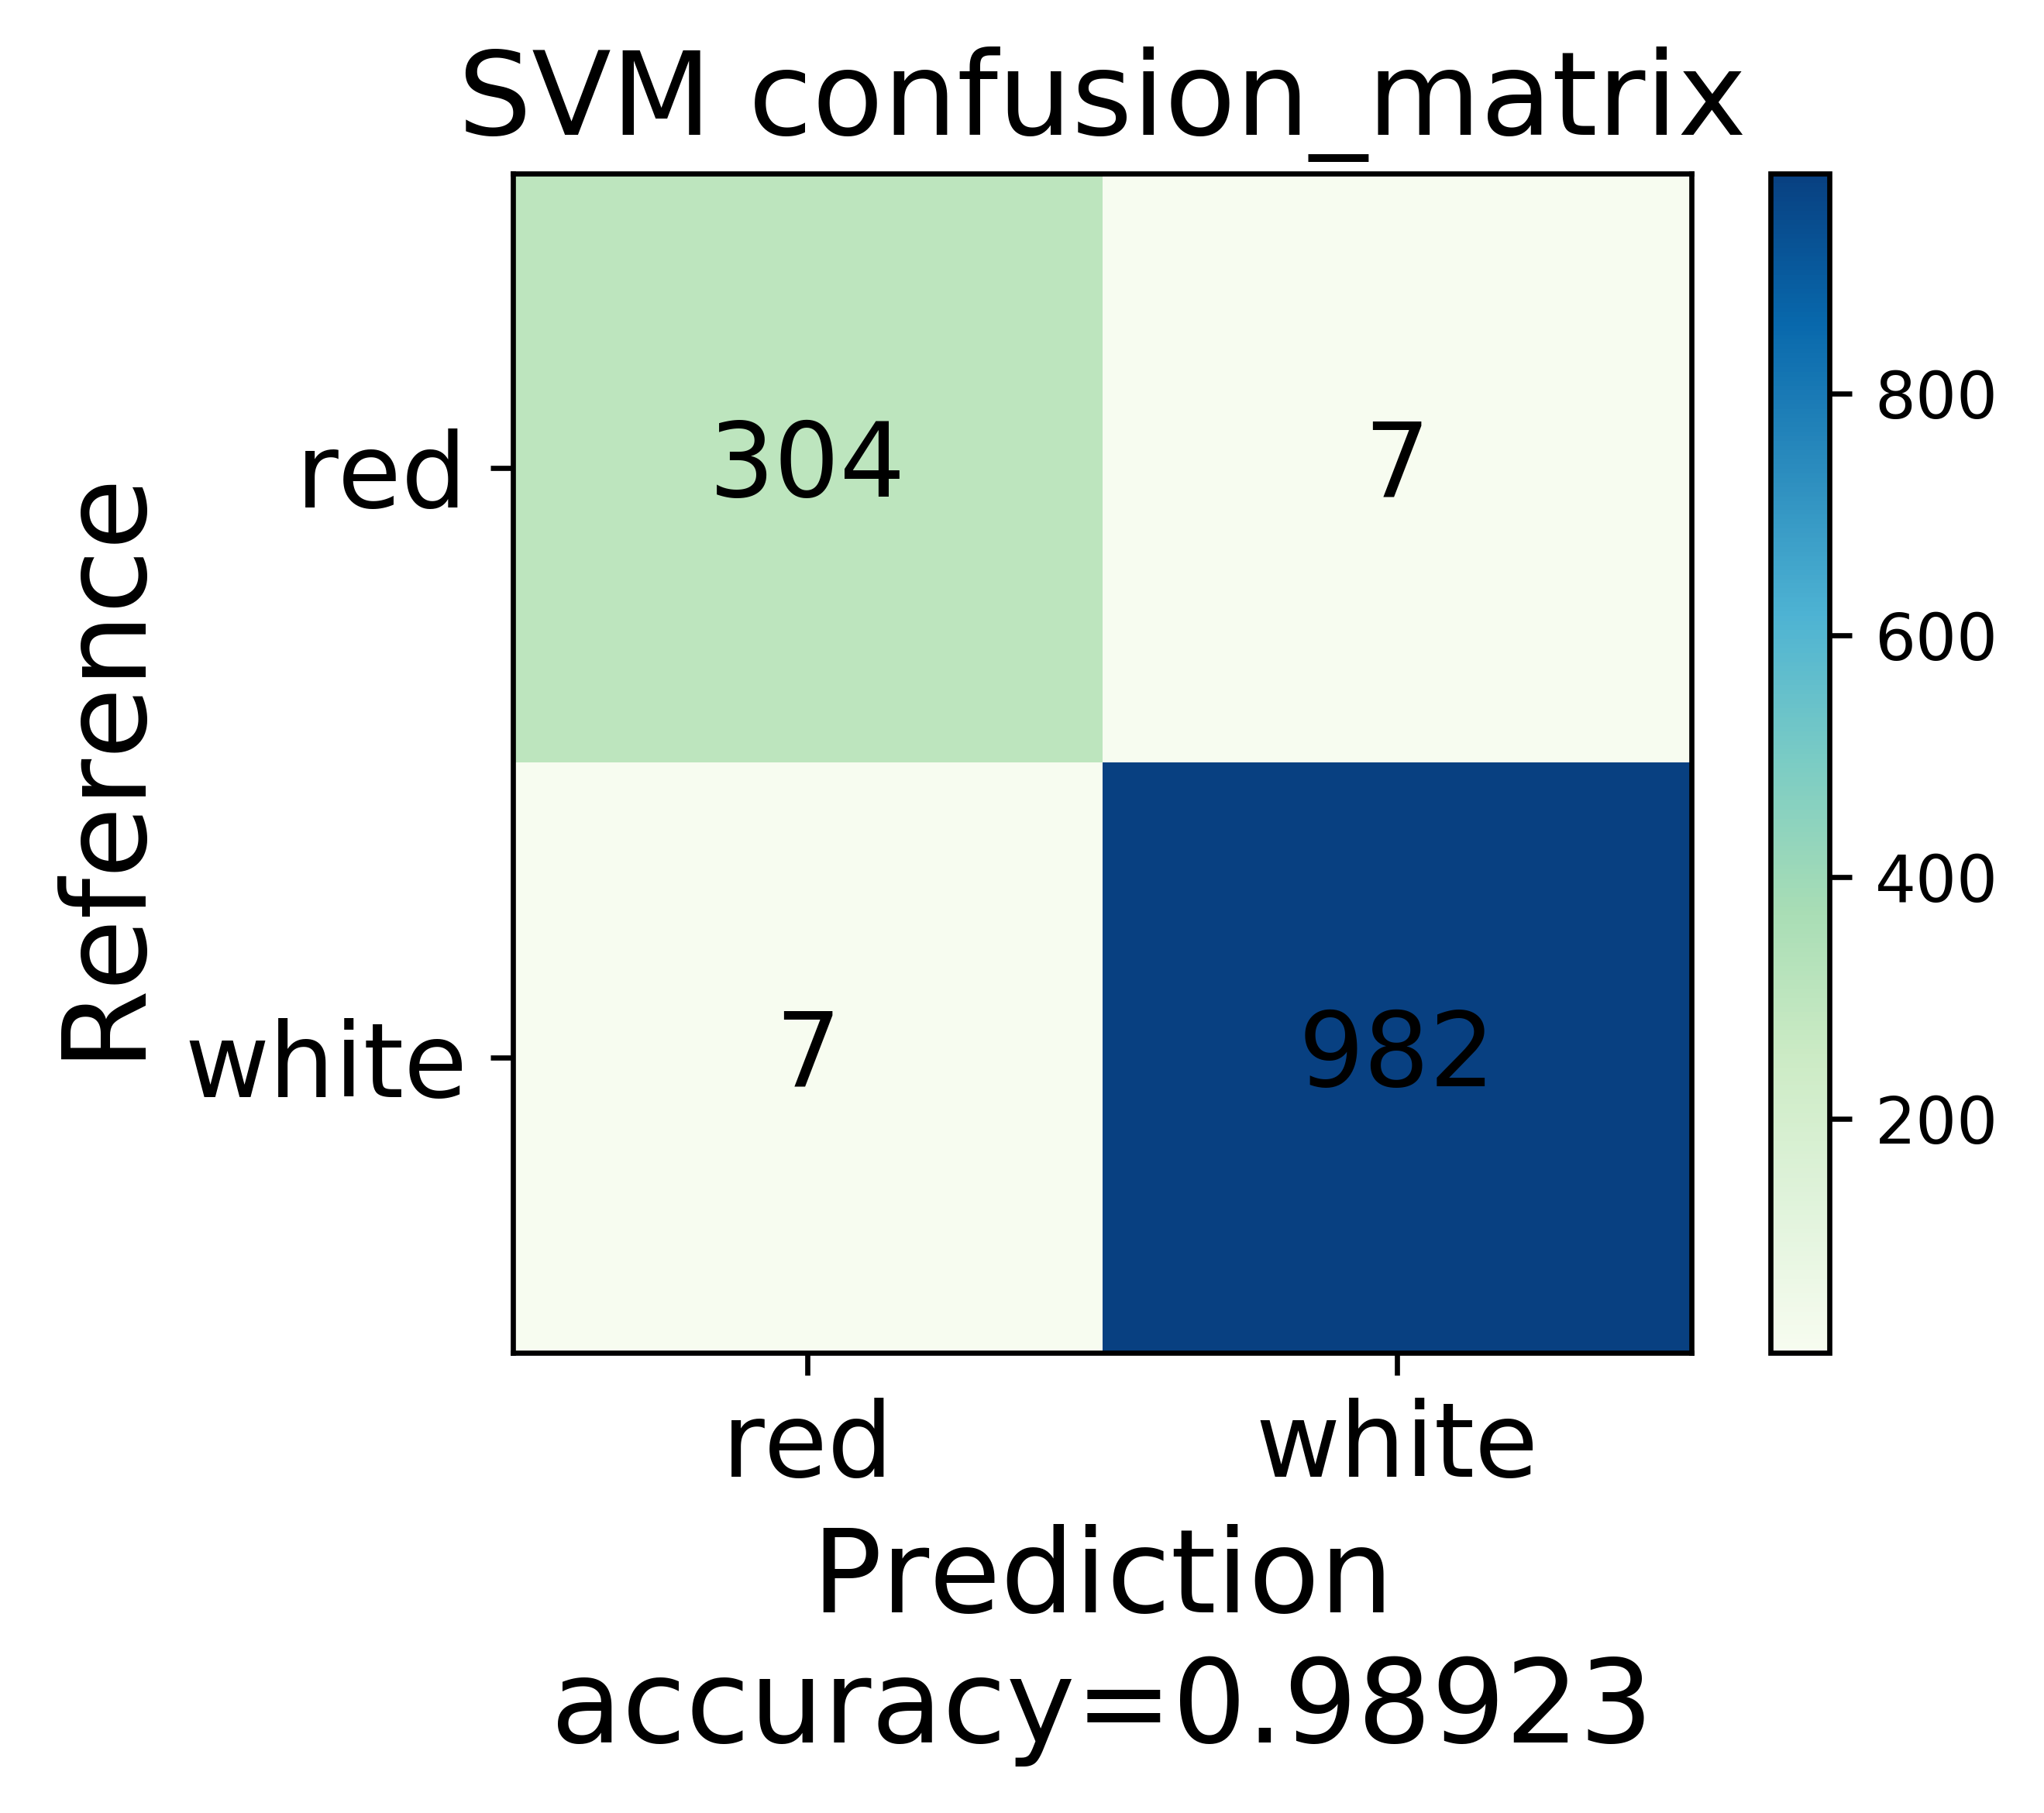

In [11]:
y2_predict = svm.predict(X_test)
y2_acc = accuracy_score(Y_test,y2_predict)
y2_cm=confusion_matrix(Y_test,y2_predict)
classes=['red','white']
plt.figure(figsize=(5, 4),dpi=600)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,size = 16)
plt.yticks(tick_marks, classes,size = 16)
plt.xlabel('Prediction\naccuracy={:0.5f}'.format(y2_acc), fontsize = 18)
plt.ylabel('Reference',fontsize = 18)
plt.title('SVM confusion_matrix',fontsize = 18)
thresh = y2_cm.max() / 2.
iters = np.reshape([[[i,j] for j in range(2)] for i in range(2)],(y2_cm.size,2))
for i, j in iters:
    plt.text(j, i, format(y2_cm[i, j]),fontsize = 16,va = 'center', ha = 'center')   #显示对应的数字
plt.tight_layout()
plt.imshow(y2_cm, interpolation='nearest', cmap=plt.cm.GnBu)  #按照像素显示出矩阵
plt.colorbar()
y2_cr=classification_report(Y_test,y2_predict)
print(y2_cr)

             precision    recall  f1-score   support

          0       0.92      0.86      0.89       311
          1       0.96      0.98      0.97       989

avg / total       0.95      0.95      0.95      1300



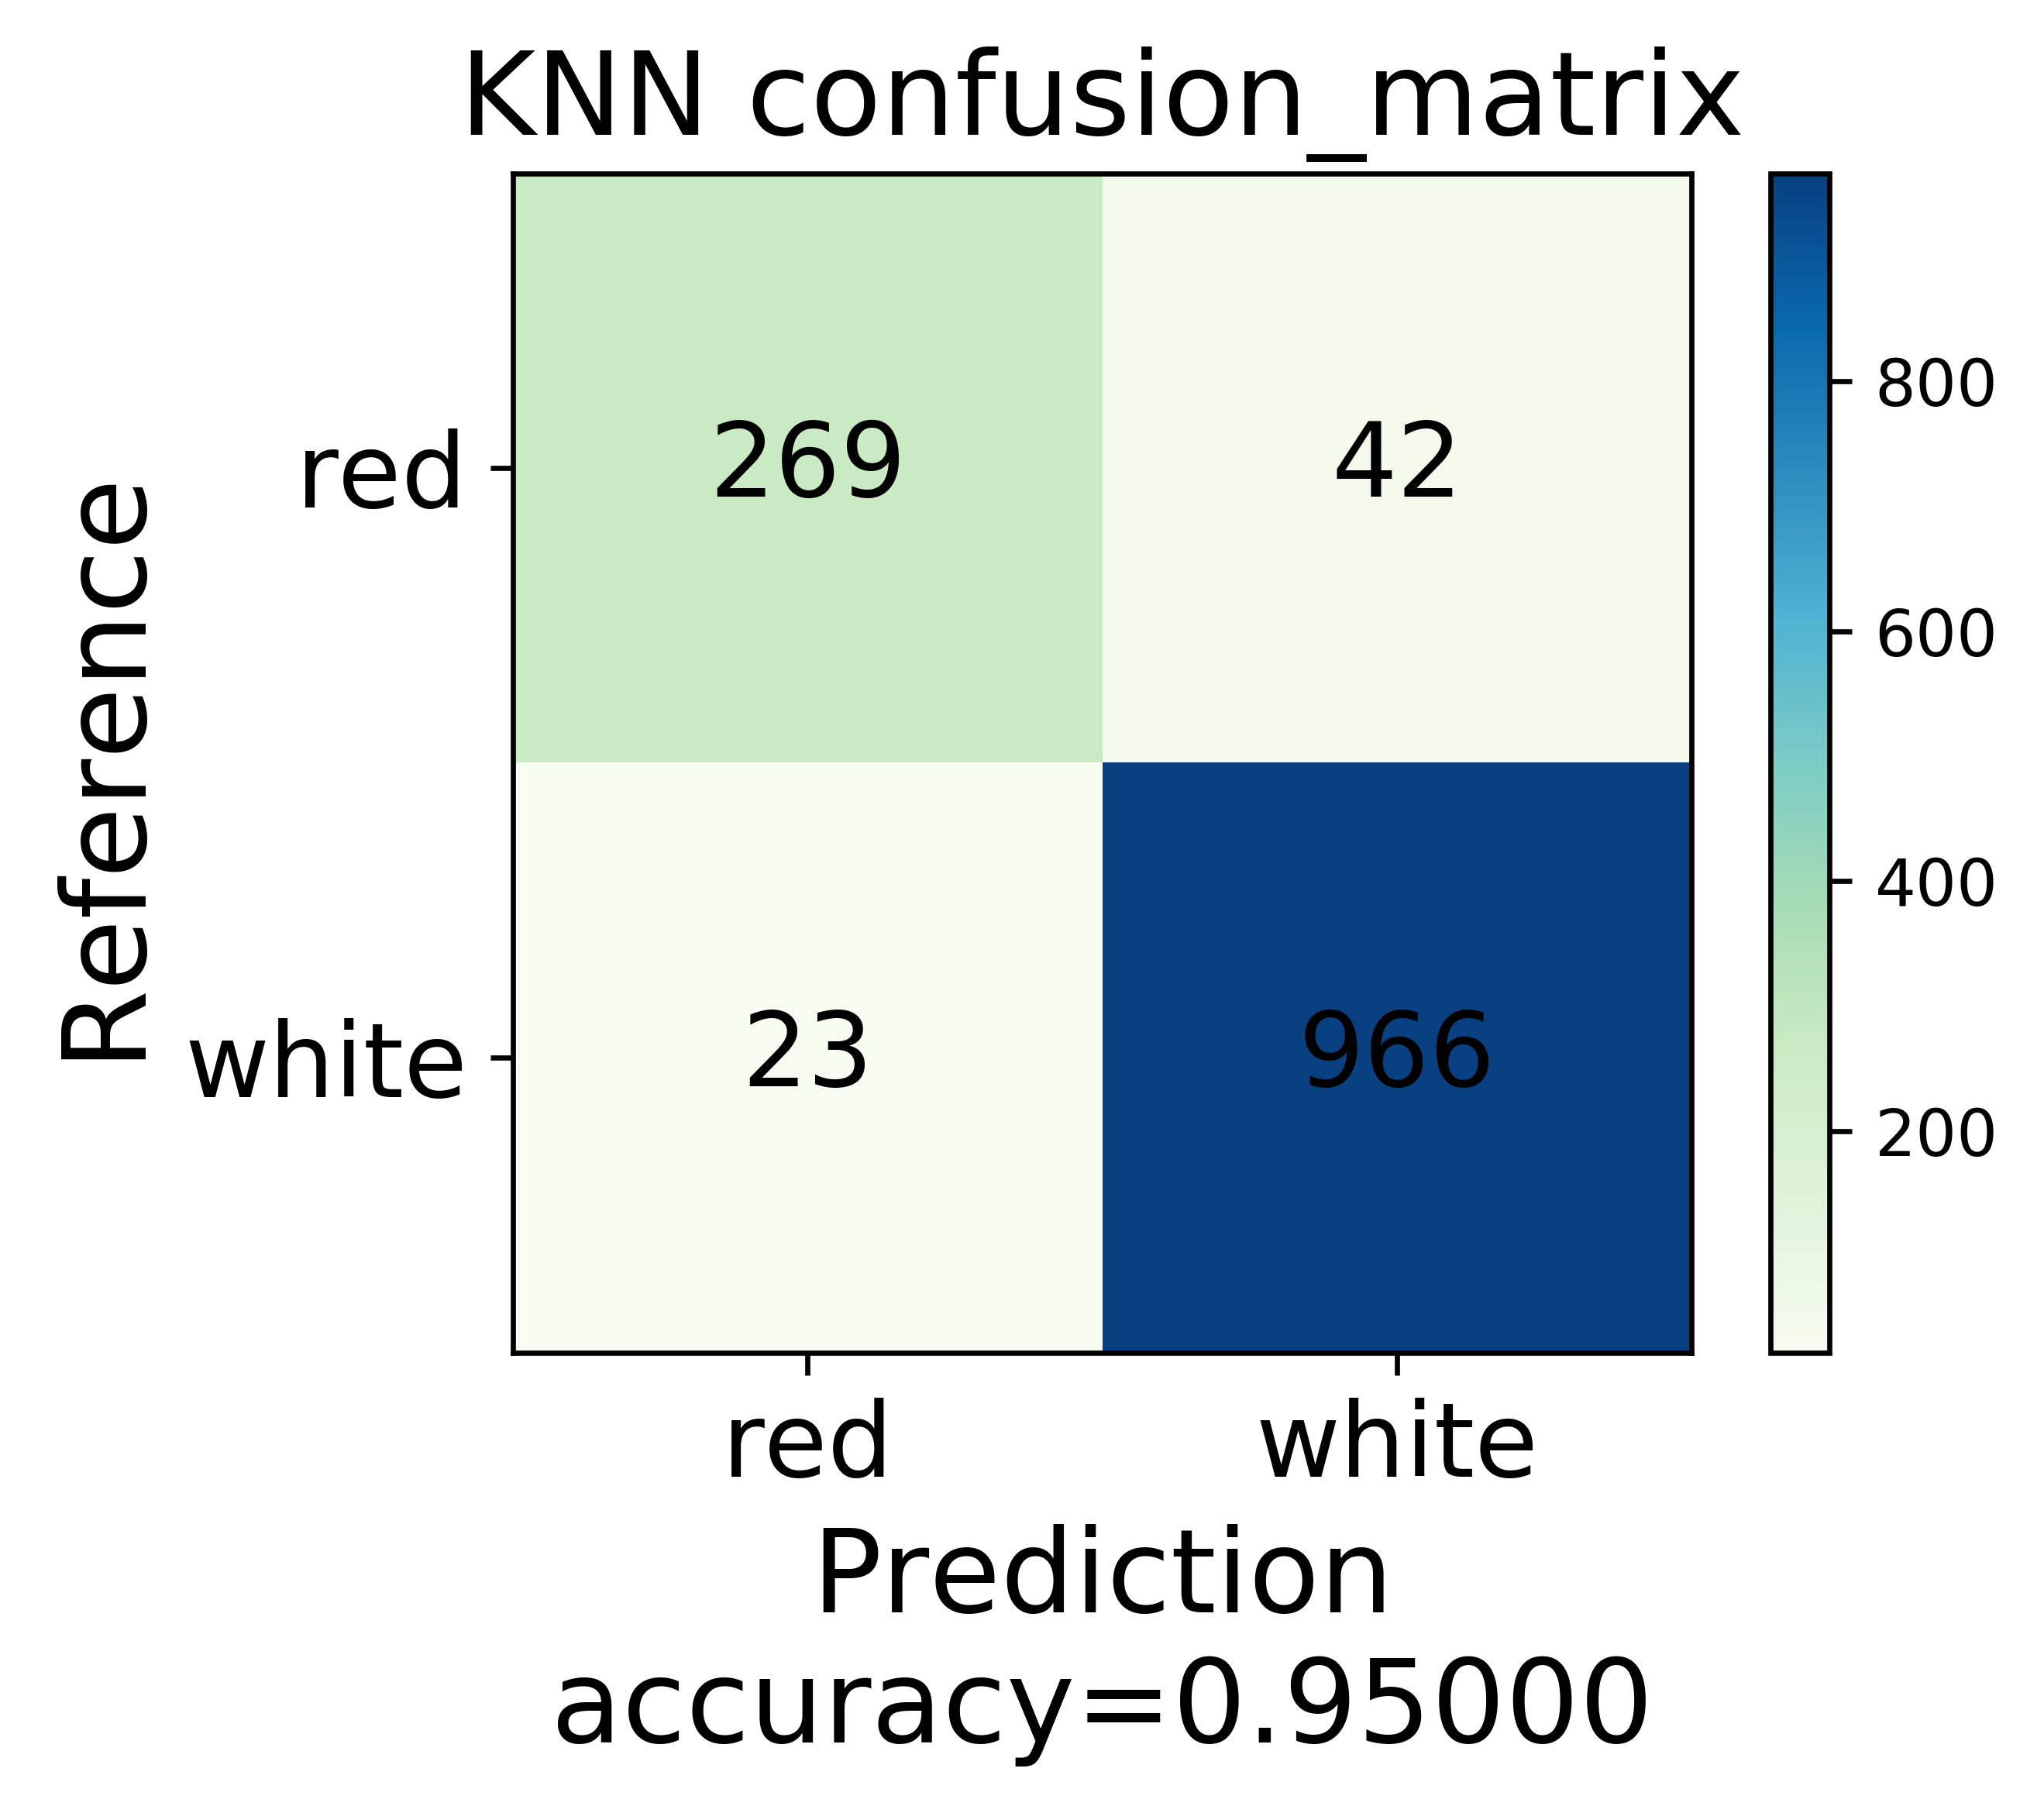

In [12]:
y3_predict = cl.predict(X_test)
y3_acc = accuracy_score(Y_test,y3_predict)
y3_cm=confusion_matrix(Y_test,y3_predict)
classes=['red','white']
plt.figure(figsize=(5, 4),dpi=600)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,size = 16)
plt.yticks(tick_marks, classes,size = 16)
plt.xlabel('Prediction\naccuracy={:0.5f}'.format(y3_acc), fontsize = 18)
plt.ylabel('Reference',fontsize = 18)
plt.title('KNN confusion_matrix',fontsize = 18)
thresh = y3_cm.max() / 2.
iters = np.reshape([[[i,j] for j in range(2)] for i in range(2)],(y3_cm.size,2))
for i, j in iters:
    plt.text(j, i, format(y3_cm[i, j]),fontsize = 16,va = 'center', ha = 'center')   #显示对应的数字
plt.tight_layout()
plt.imshow(y3_cm, interpolation='nearest', cmap=plt.cm.GnBu)  #按照像素显示出矩阵
plt.colorbar()
y3_cr=classification_report(Y_test,y3_predict)
print(y3_cr)

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       311
          1       1.00      0.99      1.00       989

avg / total       1.00      1.00      1.00      1300



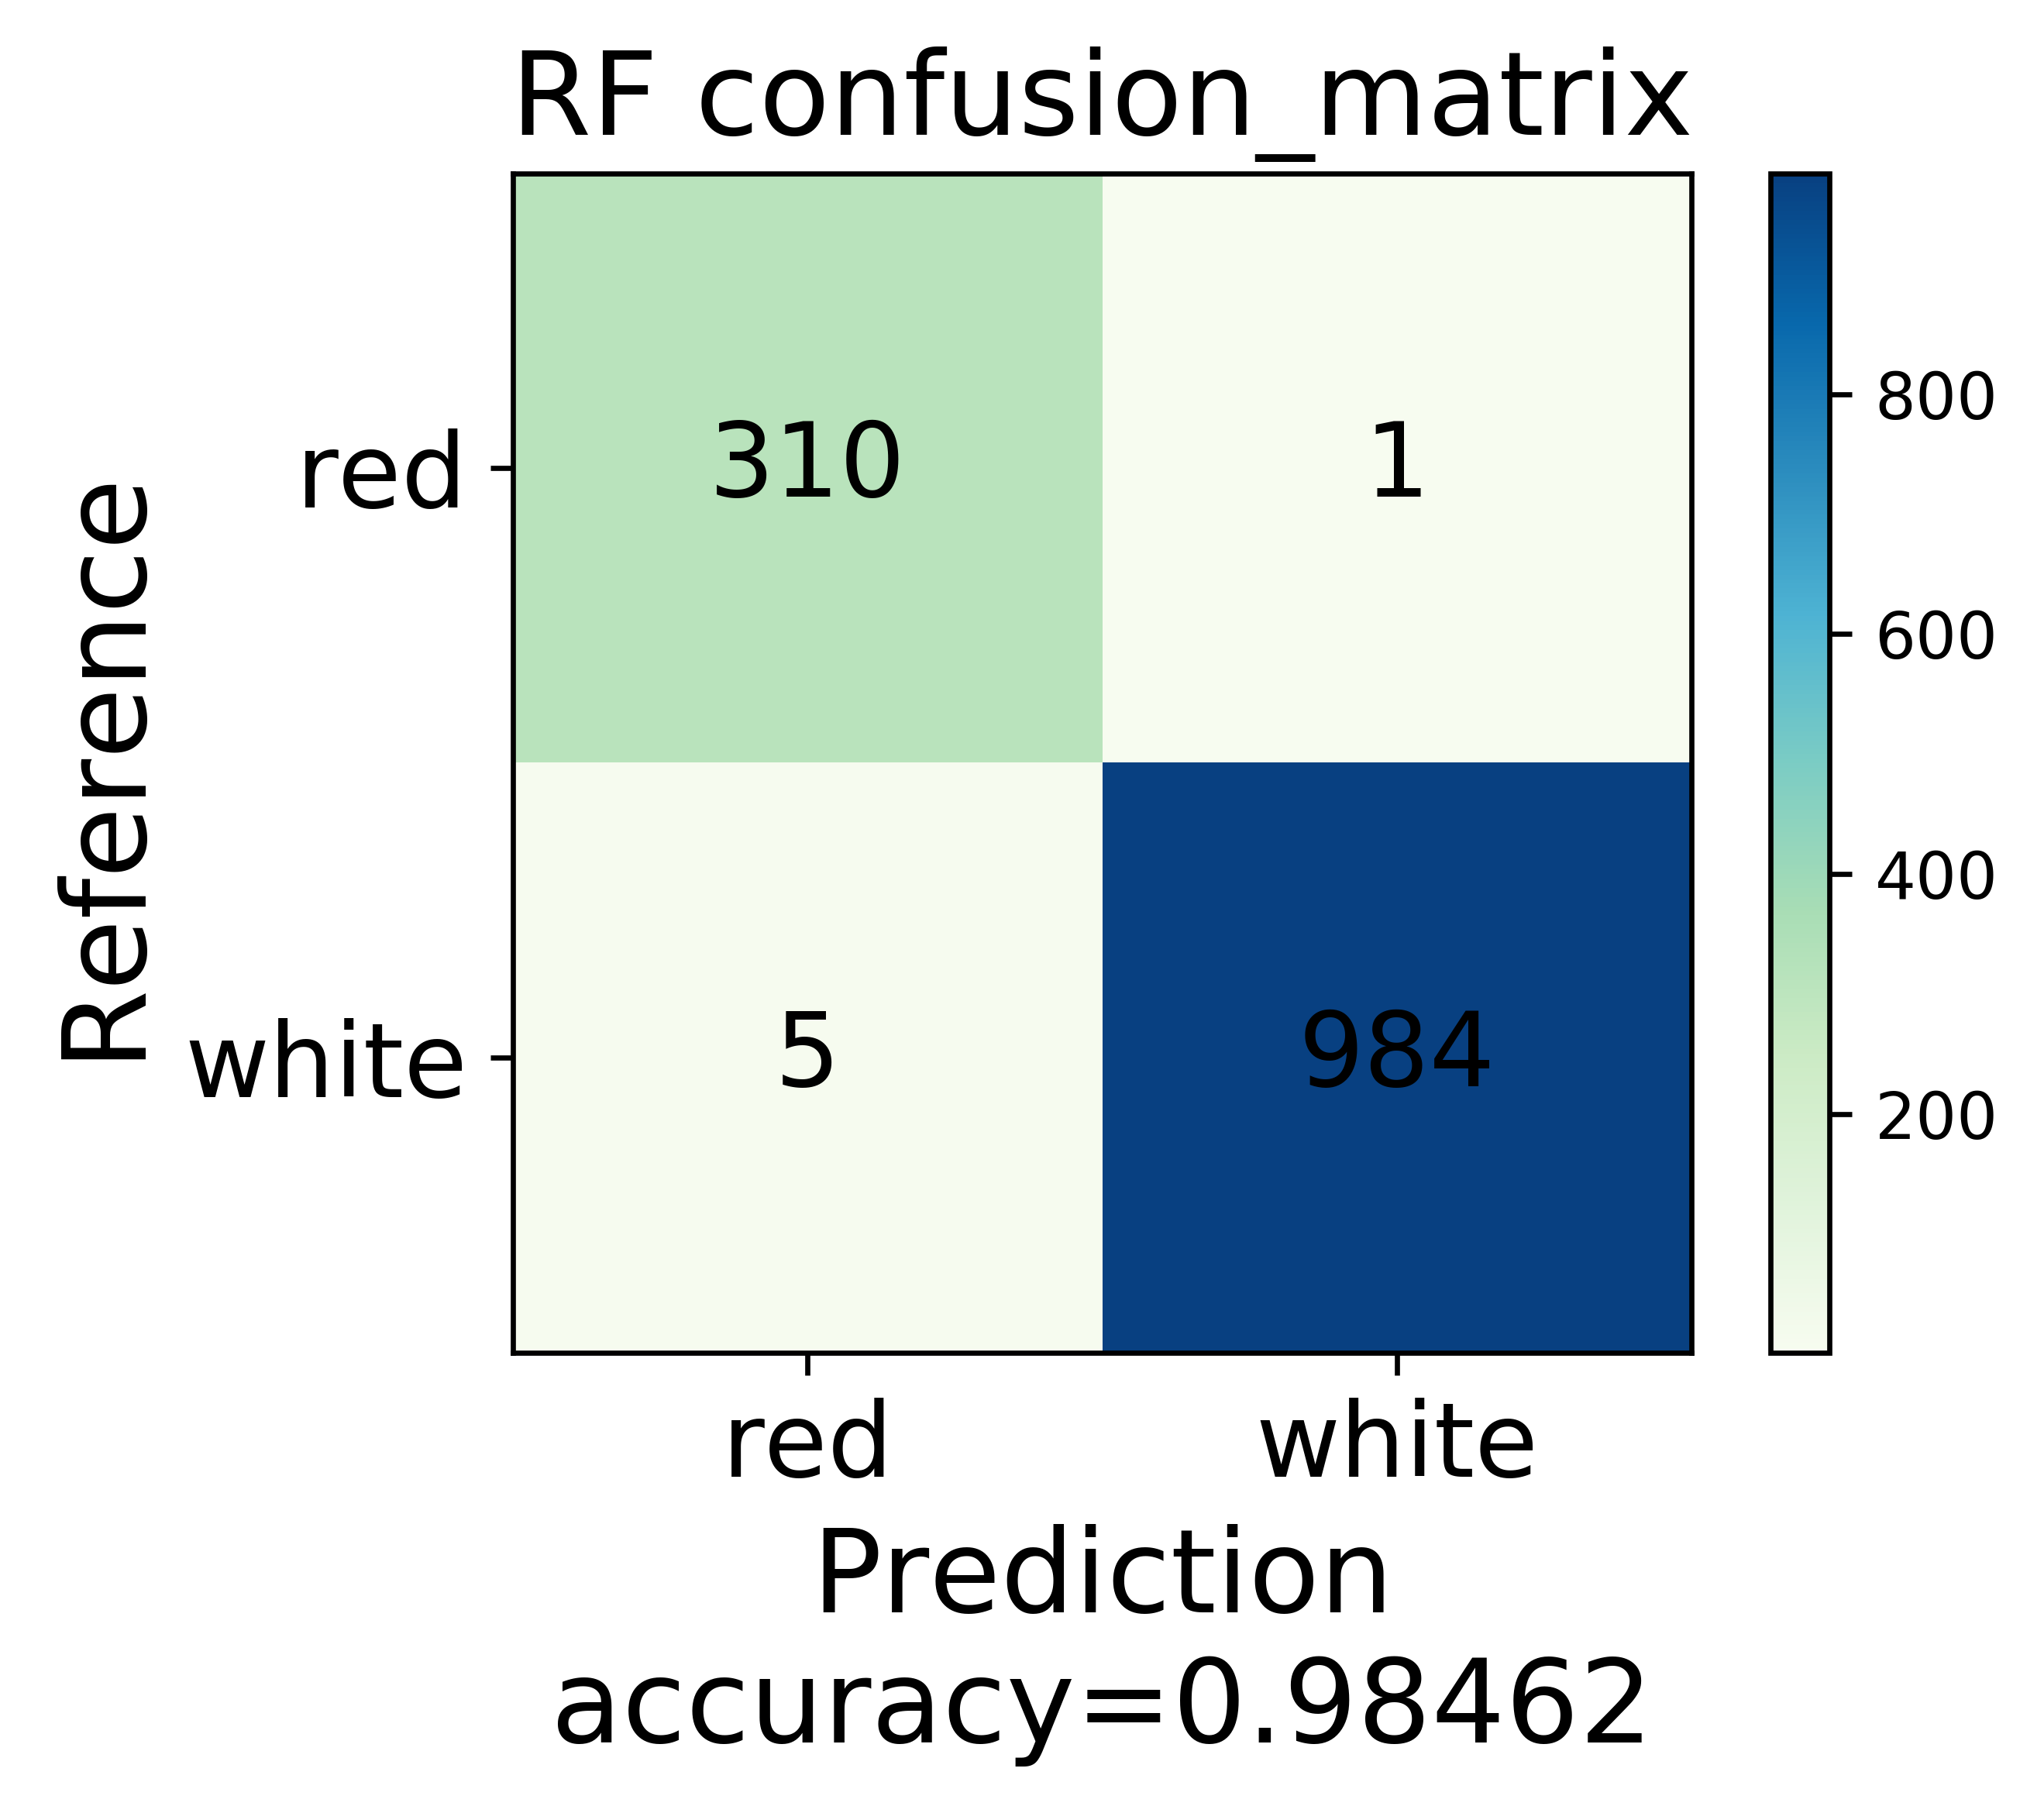

In [13]:
y4_predict = cl1.predict(X_test)
y4_acc = accuracy_score(Y_test,y4_predict)
y4_cm=confusion_matrix(Y_test,y4_predict)
classes=['red','white']
plt.figure(figsize=(5, 4),dpi=600)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,size = 16)
plt.yticks(tick_marks, classes,size = 16)
plt.xlabel('Prediction\naccuracy={:0.5f}'.format(y1_acc), fontsize = 18)
plt.ylabel('Reference',fontsize = 18)
plt.title('RF confusion_matrix',fontsize = 18)
thresh = y4_cm.max() / 2.
iters = np.reshape([[[i,j] for j in range(2)] for i in range(2)],(y4_cm.size,2))
for i, j in iters:
    plt.text(j, i, format(y4_cm[i, j]),fontsize = 16,va = 'center', ha = 'center')   #显示对应的数字
plt.tight_layout()
plt.imshow(y4_cm, interpolation='nearest', cmap=plt.cm.GnBu)  #按照像素显示出矩阵
plt.colorbar()
y4_cr=classification_report(Y_test,y4_predict)
print(y4_cr)

# AUC值、ROC曲线

In [14]:
#每个样例属于正类的概率值
Y_pred_prob =LR1.predict_proba(X_test)
#计算ROC曲线，既真正例率、假正率等
fpr1,tpr1,thresholds1 = roc_curve(Y_test,Y_pred_prob[:,1])
#计算AUC值
auc1=auc(fpr1,tpr1)
print(auc1)

0.9985077004606947


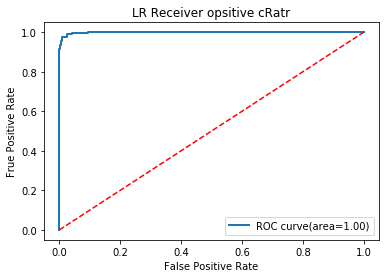

In [15]:
plt.plot(fpr1,tpr1,lw=2,label='ROC curve(area={:.2f})'.format(auc1))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('Frue Positive Rate')
plt.title('LR Receiver opsitive cRatr')
plt.legend(loc='lower right')
#AUC用得比较多的一个重要原因是，实际环境中正负样本极不均衡，PR曲线无法很好反映出分类器性能，而ROC受此影响小。

In [16]:
Y_pred_prob=svm.predict_proba(X_test)
fpr2,tpr2,thresholds2 = roc_curve(Y_test,Y_pred_prob[:,1])
auc2=auc(fpr2,tpr2)
print(auc2)

0.9988165641997666


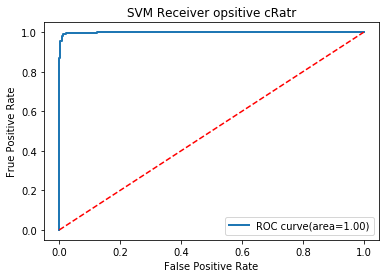

In [17]:
plt.plot(fpr2,tpr2,lw=2,label='ROC curve(area={:.2f})'.format(auc2))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('Frue Positive Rate')
plt.title('SVM Receiver opsitive cRatr')
plt.legend(loc='lower right')

In [18]:
Y_pred_prob=cl.predict_proba(X_test)
fpr3,tpr3,thresholds3 = roc_curve(Y_test,Y_pred_prob[:,1])
auc3=auc(fpr3,tpr3)
print(auc3)

0.9734718560109761


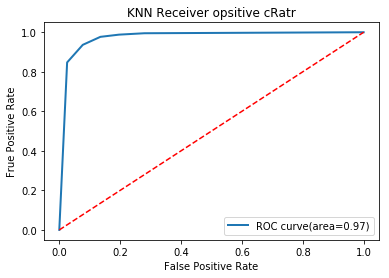

In [19]:
plt.plot(fpr3,tpr3,lw=2,label='ROC curve(area={:.2f})'.format(auc3))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('Frue Positive Rate')
plt.title('KNN Receiver opsitive cRatr')
plt.legend(loc='lower right')

In [20]:
Y_pred_prob=cl1.predict_proba(X_test)
fpr4,tpr4,thresholds4 = roc_curve(Y_test,Y_pred_prob[:,1])
auc4=auc(fpr4,tpr4)
print(auc4)

0.9975388436791849


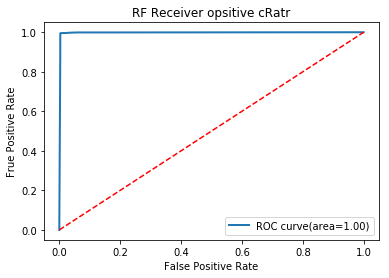

In [21]:
plt.plot(fpr4,tpr4,lw=2,label='ROC curve(area={:.2f})'.format(auc4))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('Frue Positive Rate')
plt.title('RF Receiver opsitive cRatr')
plt.legend(loc='lower right')

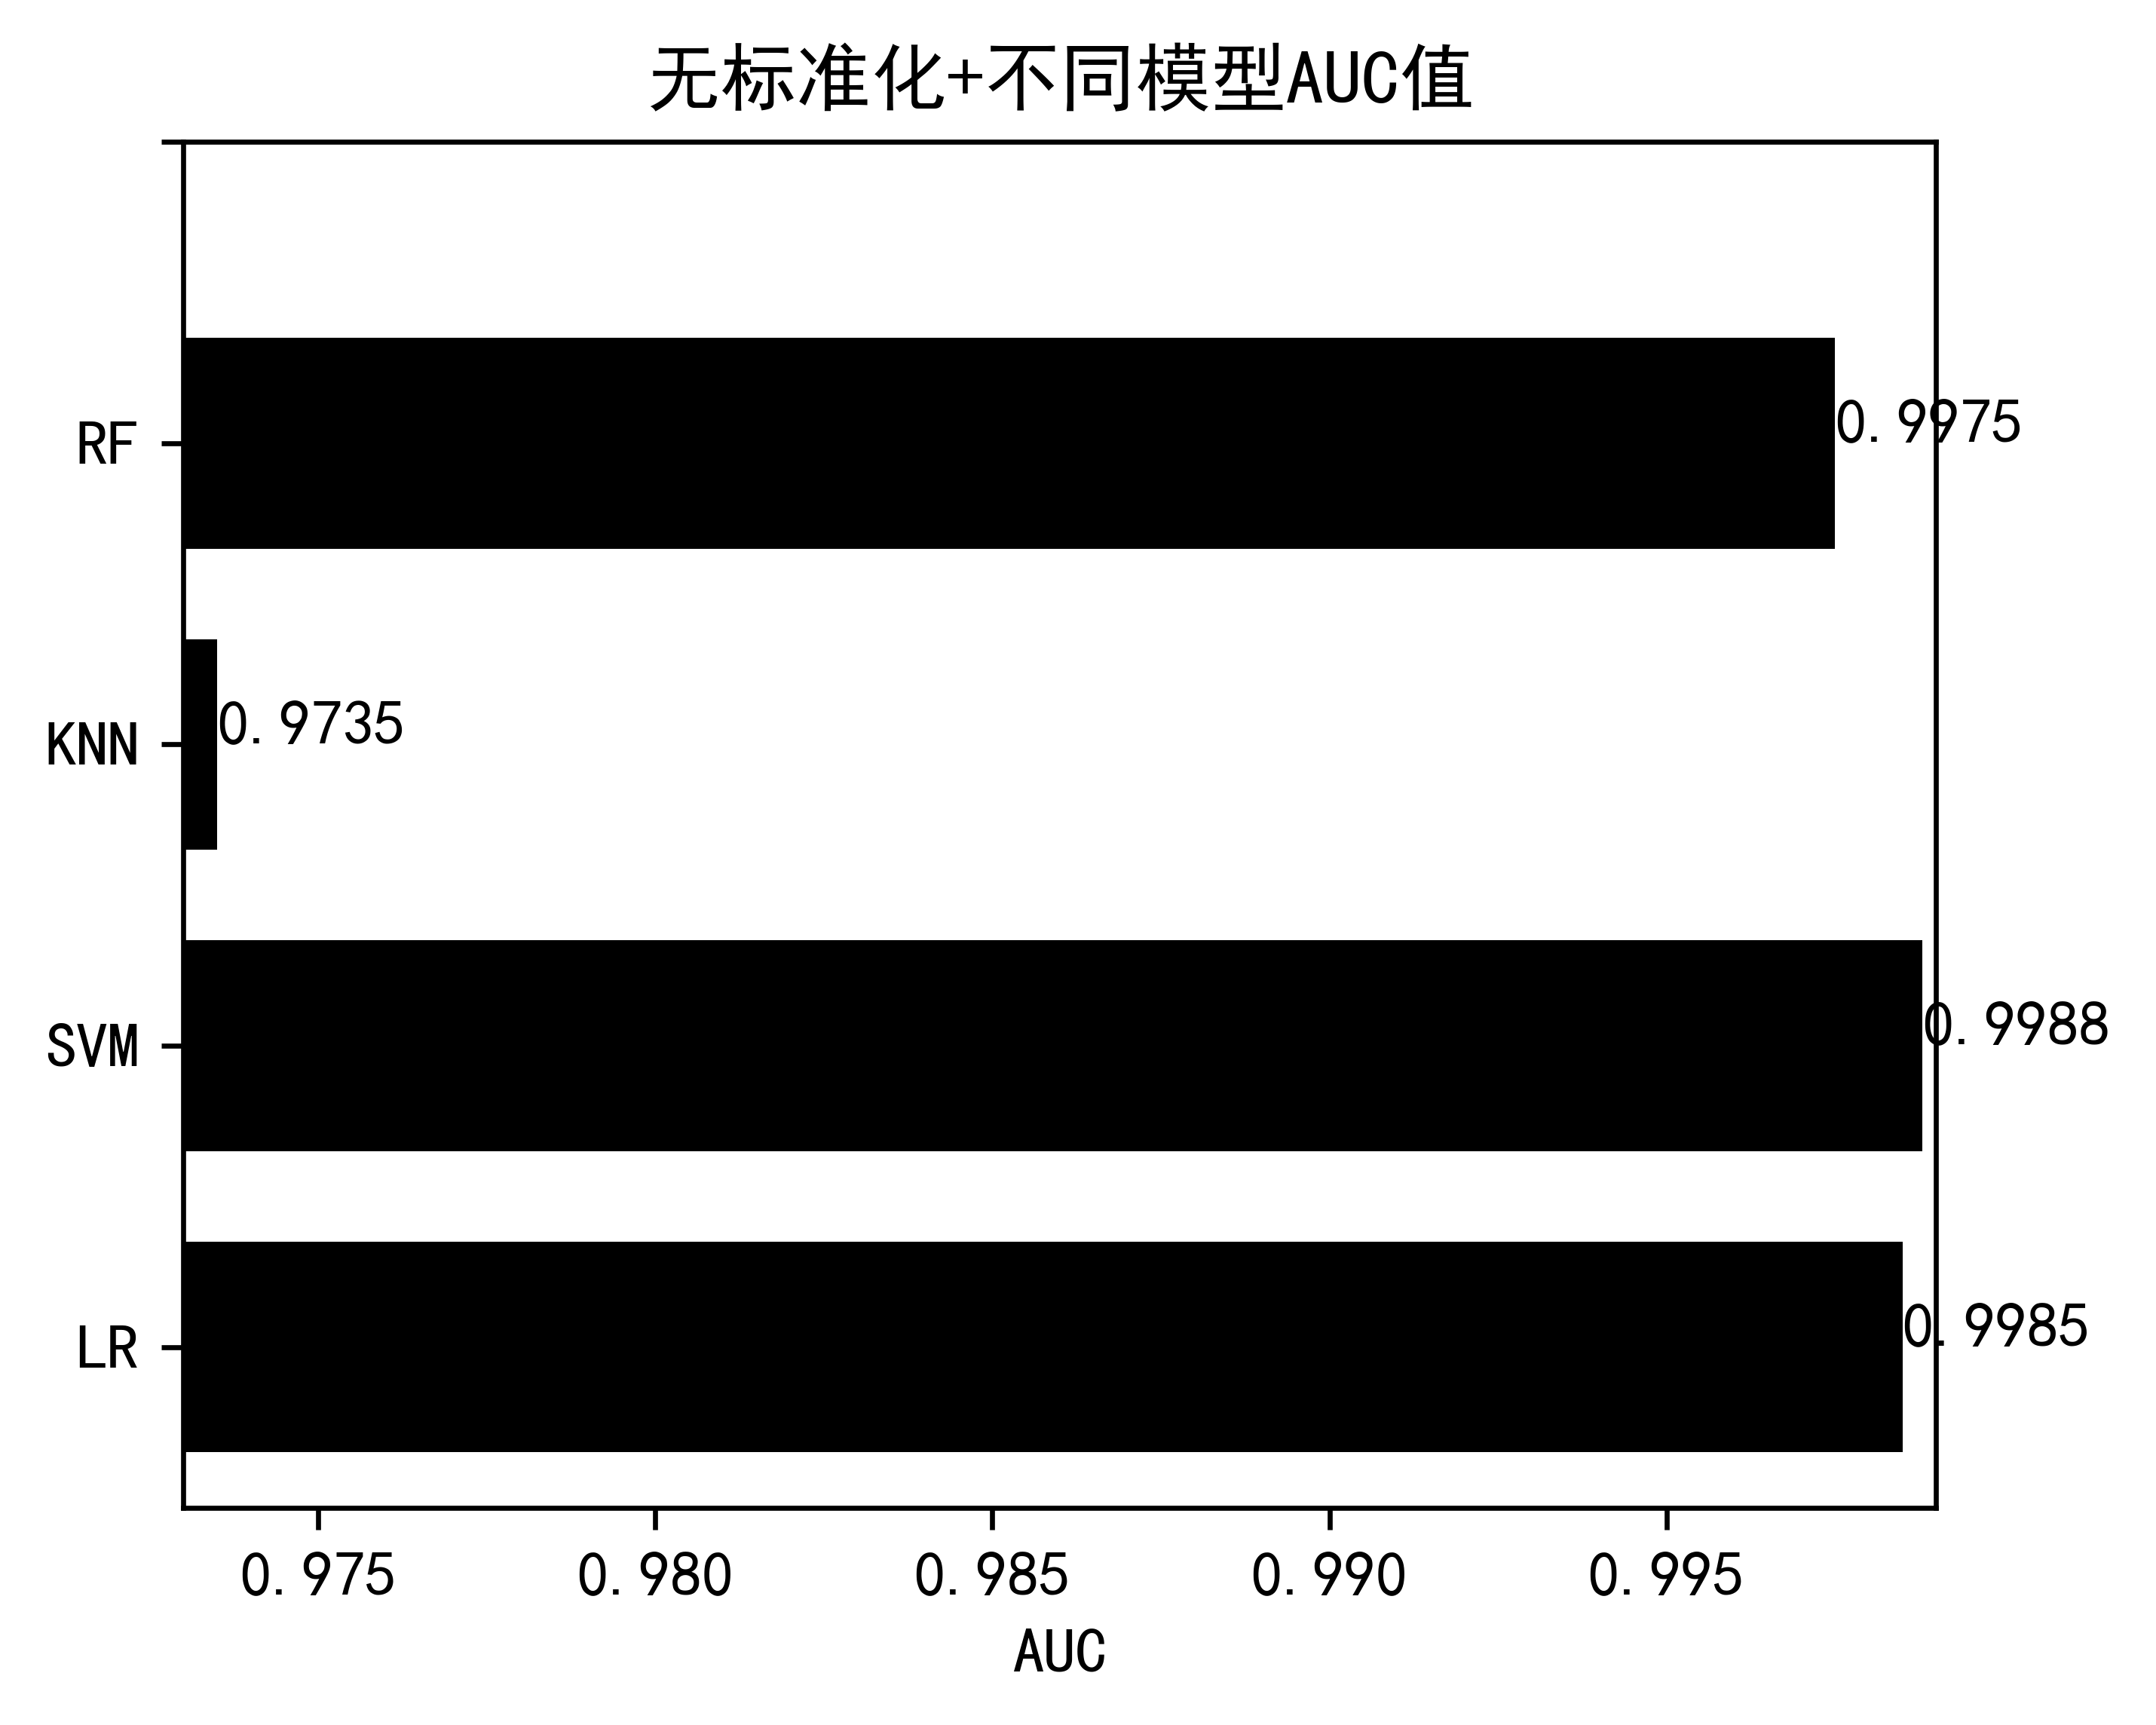

In [24]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

AUC = [round(auc1, 4), round(auc2, 4), round(auc3, 4), round(auc4, 4)] 
plt.figure(figsize=(5, 4),dpi=600)

# 绘制水平条形图
plt.barh(range(4), AUC, height=0.7, color='black', alpha=1)
plt.yticks(range(5), ['LR', 'SVM', 'KNN', 'RF'])
plt.xlim(0.973,0.999)
plt.xlabel('AUC')
plt.title('无标准化+不同模型AUC值')
for x, y in enumerate(AUC):
    plt.text(y,x,y)

plt.show()